<a href="https://colab.research.google.com/github/HeatlerX/229352-LAB04/blob/main/670510758_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [29]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [30]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [31]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [32]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

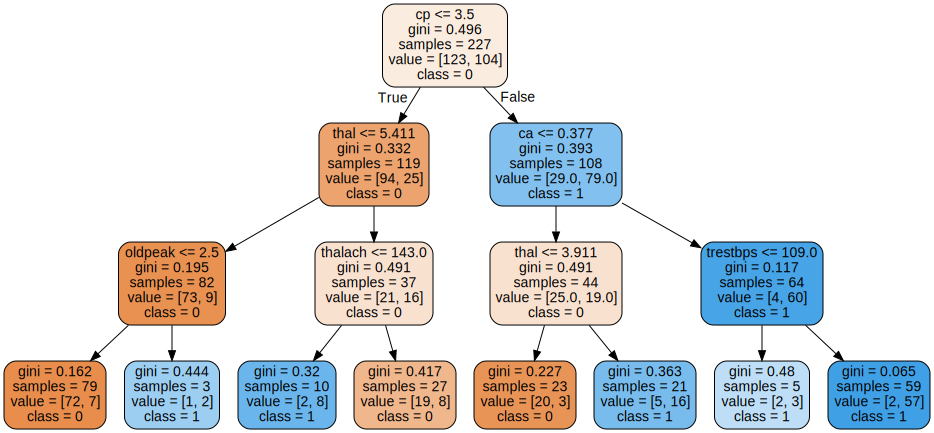

In [33]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [34]:
from sklearn.metrics import classification_report
ypred = gridcv.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.83      0.71      0.77        35

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [35]:
clf = DecisionTreeClassifier()
bagged_trees = BaggingClassifier(clf,n_estimators=100,max_samples=X_train.shape[0],max_features=5)
bagged_trees.fit(X_train,y_train)

ypred_bt = bagged_trees.predict(X_test)
print(classification_report(y_test,ypred_bt))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.84      0.74      0.79        35

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [36]:
rf = RandomForestClassifier(n_estimators=200)

rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

# Decision tree

In [37]:
params = {'max_depth': [3, 6, 9, 12],'splitter':['best','random'],'min_samples_leaf':[1,2,3,4]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [38]:
ypred = gridcv.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        41
           1       0.84      0.77      0.81        35

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76



In [39]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

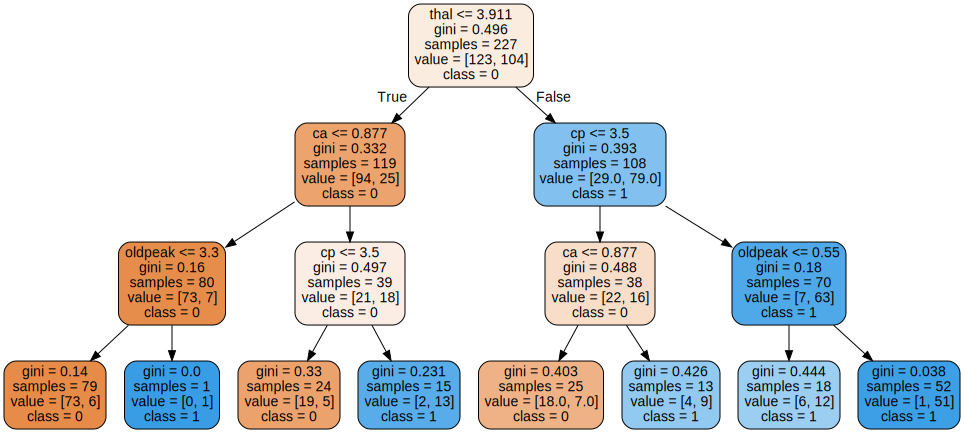

In [40]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

# Bagging tree

In [41]:
params = {'n_estimators': [100,200,300],'max_features':[1,3,5,7,9],'bootstrap_features':[True,False]}
bgt = BaggingClassifier()
gridcv = GridSearchCV(bgt, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap_features': [True, False],
                         'max_features': [1, 3, 5, 7, 9],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [42]:
gridcv.best_estimator_

BaggingClassifier(bootstrap_features=True, max_features=9, n_estimators=300)

In [43]:
ypred = gridcv.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.90      0.77      0.83        35

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



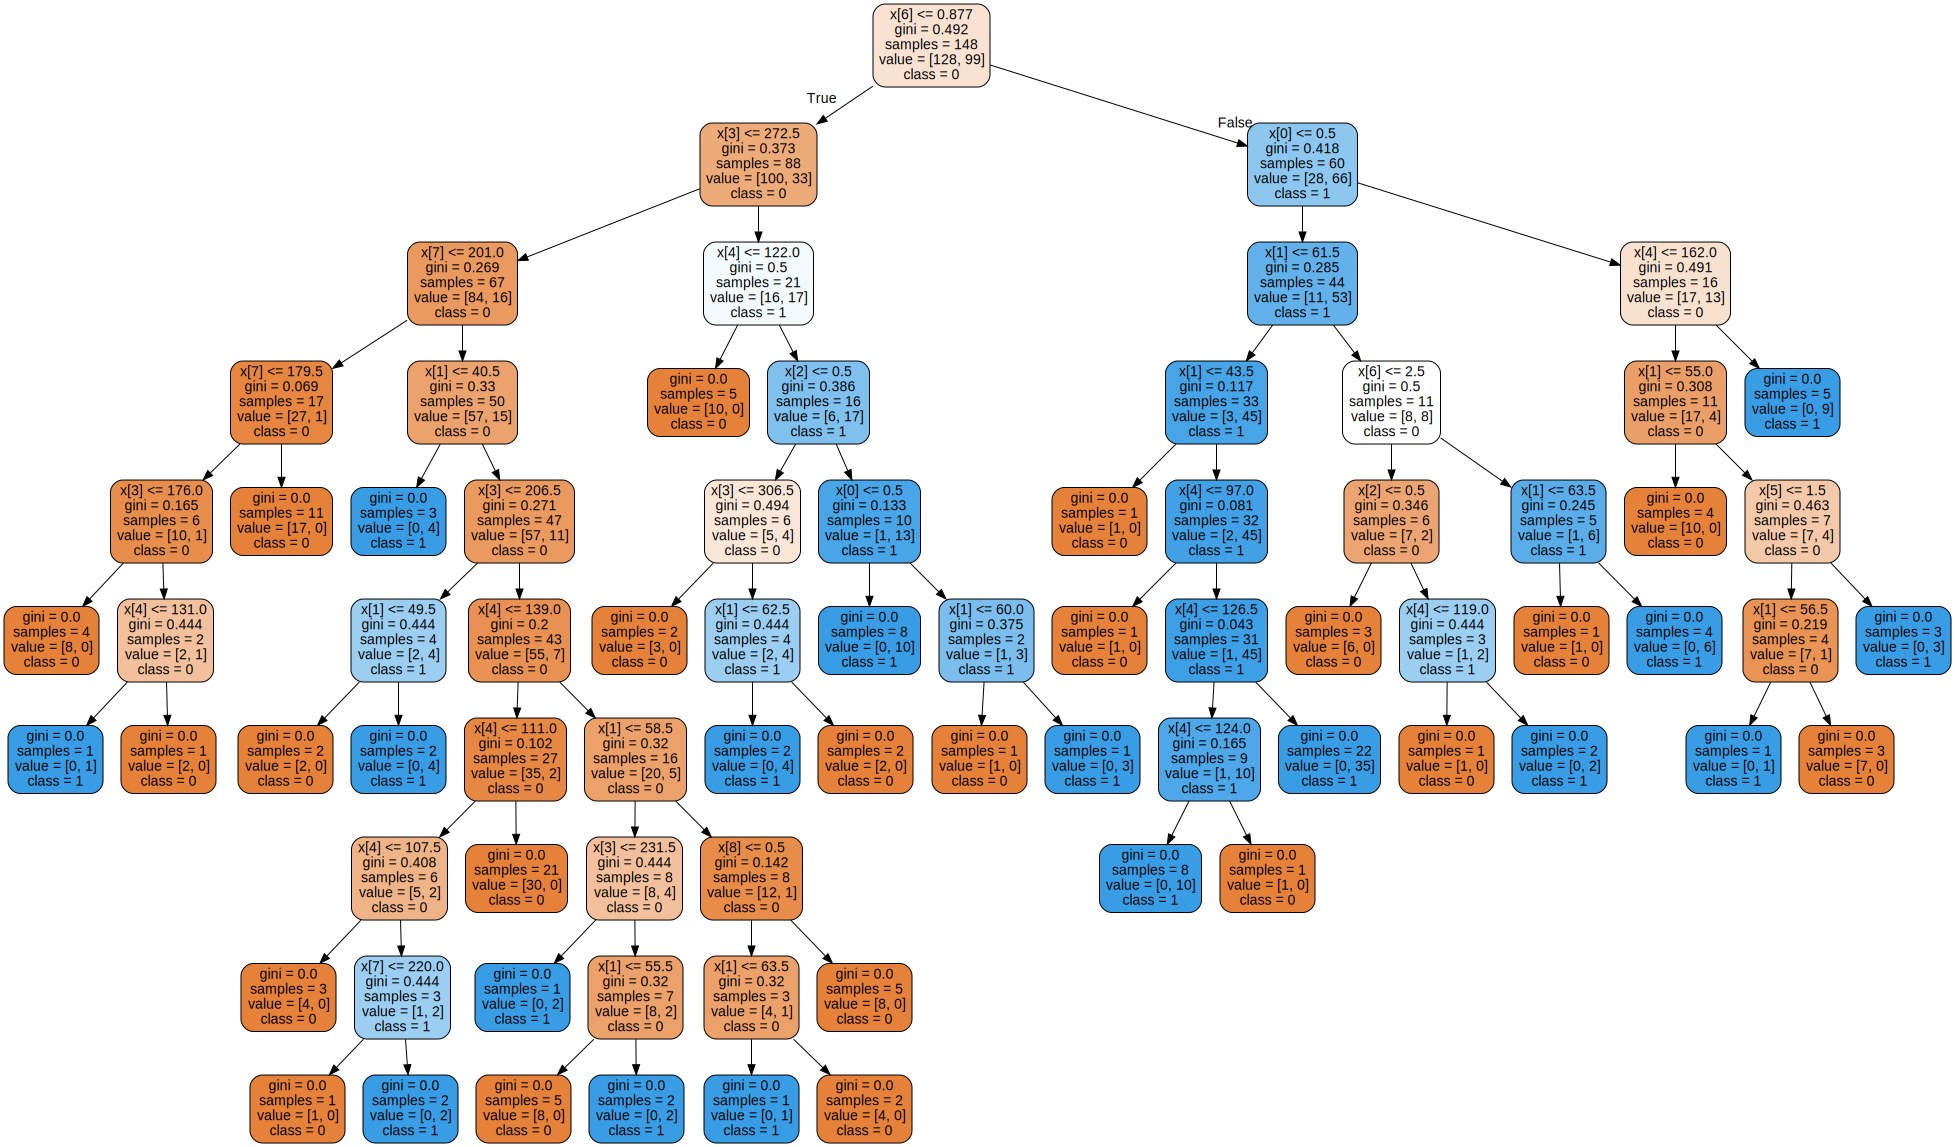

In [48]:
plot_data = export_graphviz(gridcv.best_estimator_.estimators_[0],
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=None,
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

# Random forest

In [53]:
rf = RandomForestClassifier()

params = {
    "n_estimators": [100, 200,300],
    "max_depth": [3,6,9,12],
    "max_features":[ "sqrt", "log2"]
}
gridcv = GridSearchCV(rf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [54]:
gridcv.best_estimator_

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=300)

In [55]:
ypred = gridcv.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.93      0.77      0.84        35

    accuracy                           0.87        76
   macro avg       0.88      0.86      0.87        76
weighted avg       0.88      0.87      0.87        76



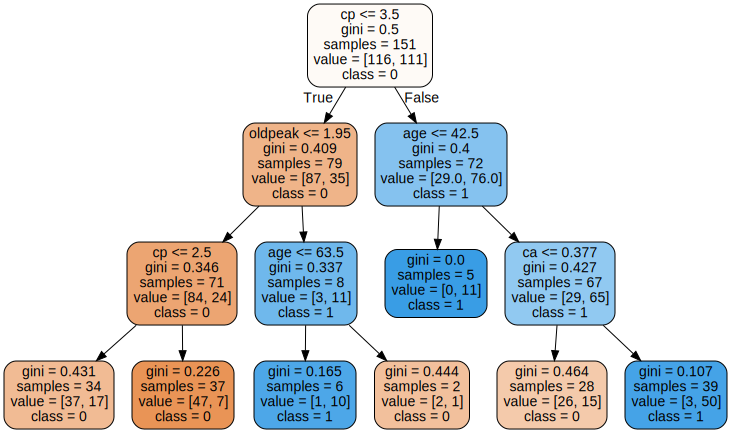

In [56]:
plot_data = export_graphviz(gridcv.best_estimator_[0],
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

Decision tree
max_depth ความลึกต้นไม้ ถ้าเยอะจะ overfitting
splitter เงื่อนไขในการแยกโหนดแบบดีสุดหรือสุ่ม ดีสุดมีโอกาส overfitting เลยเพิ่มมการสุ่ม
min_samples_leaf จำนวนตัวอย่างขั้นต่ำที่ปลายกิ่งแต่ละใบต้องมี เพื่อให้เสถียร

Bagging tree
n_estimators จำนวนต้นไม้ เพื่อเพิ่มโอกาสการทำนายแม่นยำ
max_features จำนวนตัวแปร เพิ่มคความต่างโมเดลดูว่าอันไหนเหมาะสุด
bootstrap_features การสุ่มเลือกคุณลักษณะสามารถเลือกซ้ำได้หรือไม่ เพิ่มความแม่นยำ

random forest
n_estimators จำนวนต้นไม้ เพื่อเพิ่มโอกาสการทำนายแม่นยำ
max_depth ความลึกต้นไม้ ถ้าเยอะจะ overfitting
max_features จำนวนตัวแปร เพิ่มคความต่างโมเดลดูว่าอันไหนเหมาะสุด


**best model = Random forest
 accuracy         =  0.87     
 macro avg      =  0.87  
 RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=300) **